# Data Wrangling and Exploratory Data Analysis

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#!pip install yfinance

### Load Data

In [3]:
# importing the yfinance package
import yfinance as yf

# giving the start and end dates
startDate = '2021-01-01'
endDate = '2023-12-31'

# set stock names and create dict
tech = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']
cars = ['TSLA', 'F', 'GM', 'TM', 'RACE']
health = ['PFE', 'JNJ', 'CVS', 'UNH', 'LLY']
finance = ['BAC', 'C', 'WFC', 'JPM', 'USB']
games = ['AMD', 'GME', 'NVDA', 'EA', 'RBLX']
companies = tech + cars + health + finance + games
stockData = {}

for name in companies:
    # downloading the data of the ticker value between
    # the start and end dates
    resultData = yf.download(name, startDate, endDate)
    # store data in dict
    stockData[name] = resultData.reset_index()

stockData['META'].head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
1,2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2,2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
3,2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
4,2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300


In [4]:
stockData['META'].dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [5]:
# check for null values
for key, df in stockData.items():
    null_values = df.isnull().any().any()  # Returns True if there are any null values, otherwise False
    if null_values:
        print(f"DataFrame '{key}' contains null values.")

Nothing returned, so we have no null values inside our data set.

## EDA

Let's try plotting all of our stock price data at once.

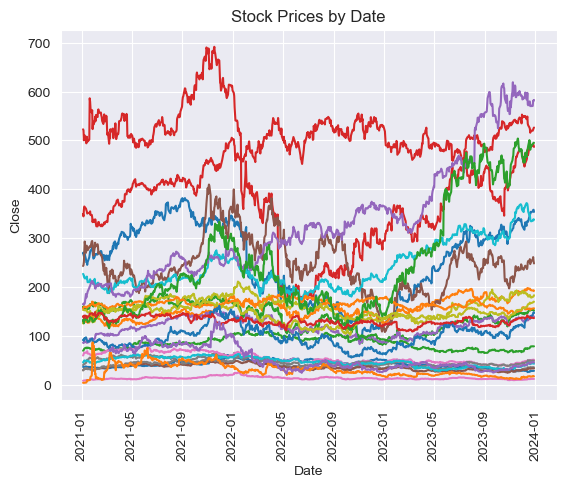

In [6]:
sns.set_style('darkgrid')

for stock in stockData:
    sns.lineplot(stockData[stock],x='Date',y='Close')#,label=stock)
    
plt.title('Stock Prices by Date')
plt.xticks(rotation=90)
plt.show()

Plotting all the stock data doesn't fit best because stock prices are all different prices. It's best to look at their price change. We can also divide our stocks into our five sectors and compare them as a whole.

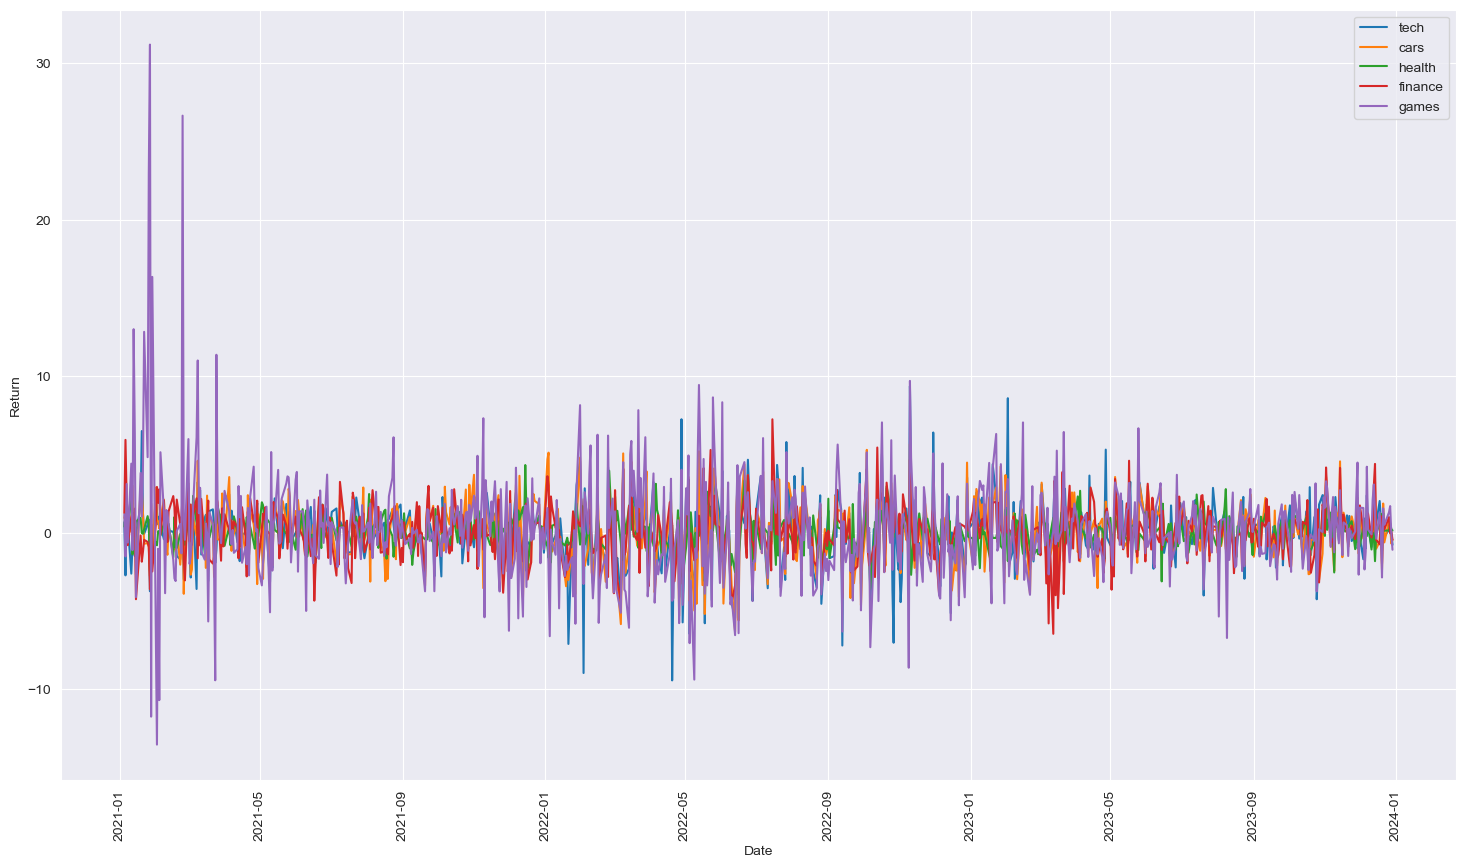

In [7]:
# Pct change column
for stock in stockData:
    stockData[stock]['Return'] = stockData[stock]['Close'].pct_change() * 100
    #sns.lineplot(techStocks[stock],x='Date',y=returns)

# seperate stockData into 5 sectors
techStocks = {key: stockData[key] for key in tech}
carStocks = {key: stockData[key] for key in cars}
healthStocks = {key: stockData[key] for key in health}
financeStocks = {key: stockData[key] for key in finance}
gameStocks = {key: stockData[key] for key in games}

sectors = {'tech':techStocks, 'cars':carStocks, 'health':healthStocks, 'finance':financeStocks, 'games':gameStocks}

fig, ax = plt.subplots(figsize=(18, 10))

for sector in sectors:
    concatenated_df = pd.concat(sectors[sector].values(), keys=sectors[sector].keys())
    #average_values = concatenated_df.groupby('Return').mean(numeric_only=True)
    average_values = concatenated_df.groupby('Date')['Return'].mean()
    sns.lineplot(data=average_values,label=sector)
    
#plt.legend(title='Sectors', loc='upper right', labels=['Tech', 'Cars', 'Health', 'Finance', 'Games'])
plt.xticks(rotation=90)
plt.show()

Since the lines are overlapping, we can try using a heatmap to best look at the correlations.

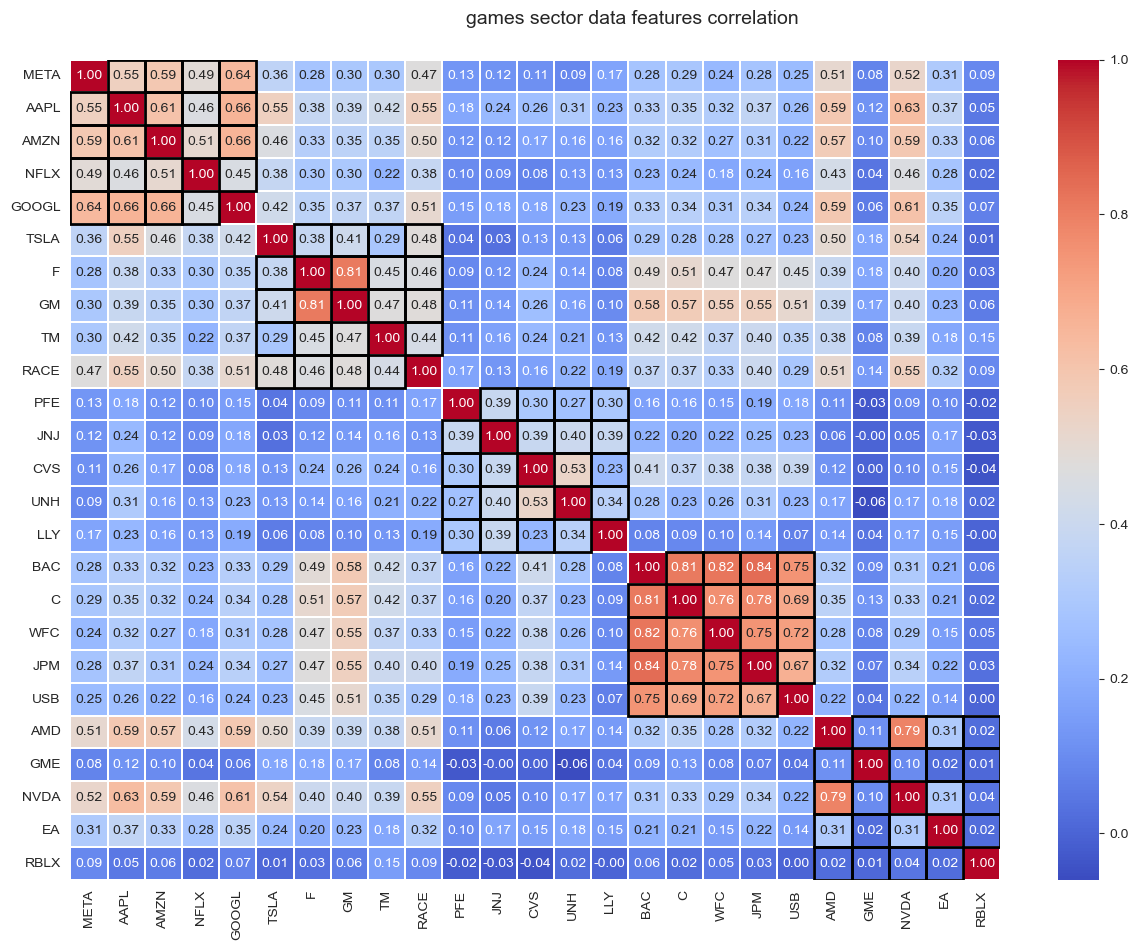

In [25]:
#for stock in stockData
heatmap_data = pd.concat([df['Return'].rename(df_name) for df_name, df in stockData.items()], axis=1)
corrmat = heatmap_data.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                      linewidths=.05)
highlight_indices = [(0, 1),(0, 2),(0, 3),(0,4),(1,0),(1,2),(1,3),
                     (1,4),(2,0),(2,1),(2,3),(2,4),(3,0),(3,1),(3,2),(3,4),(4,0),(4,1),(4,2),(4,3)]
for k in range(5):
    for i, j in highlight_indices:
        plt.gca().add_patch(plt.Rectangle((j+5*k, i+5*k), 1, 1, fill=False, edgecolor='black', lw=2))
    
f.subplots_adjust(top=0.93)
t= f.suptitle(sector + ' sector data features correlation', fontsize=14)

I've decided to highlight the boxes that have correlated stocks in the same sector. We can see that especially for the banking sector, we have strong correlations. We can now try and plot a mix of same sector and mixed sector stock comparisons.

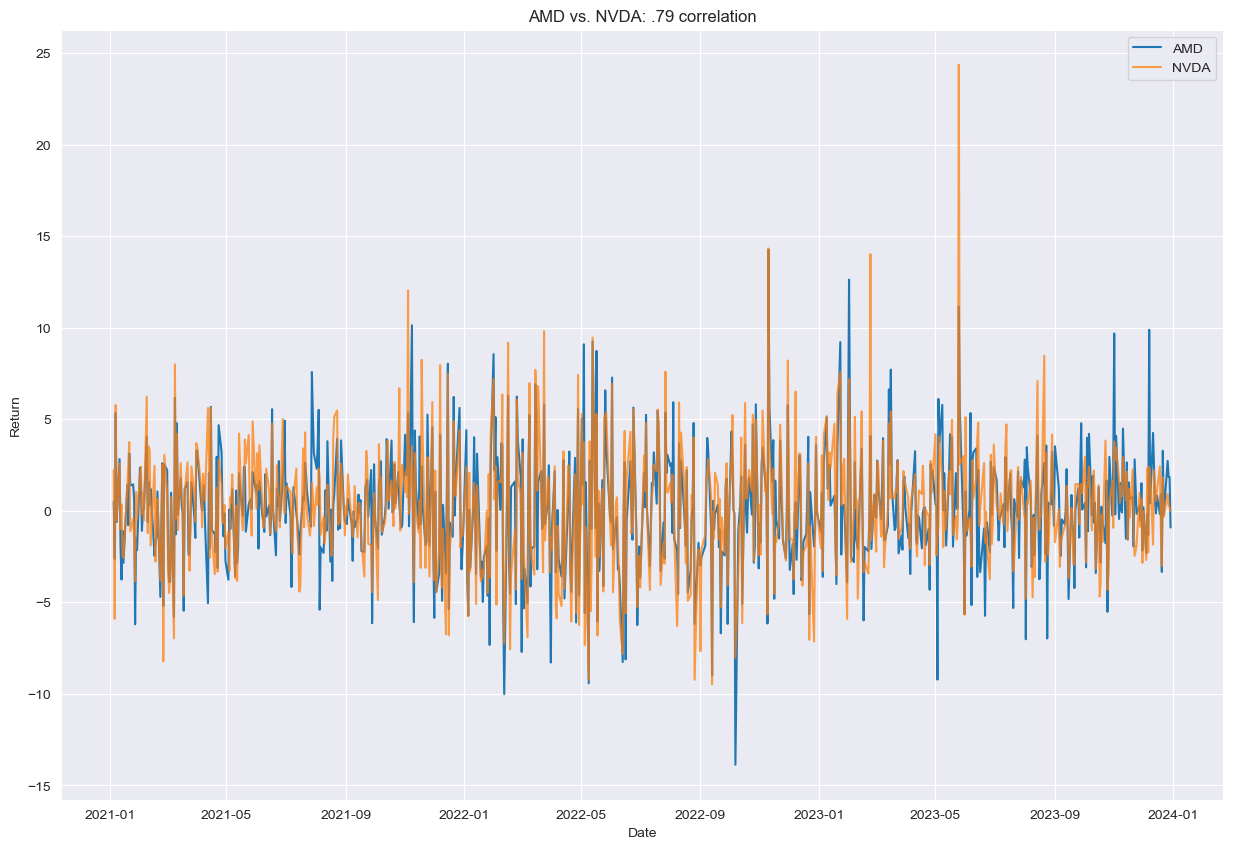

In [9]:
f, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(stockData['AMD'],x='Date',y='Return', label='AMD')
sns.lineplot(stockData['NVDA'],x='Date',y='Return', alpha=.75, label='NVDA')
plt.title('AMD vs. NVDA: .79 correlation')
plt.show()

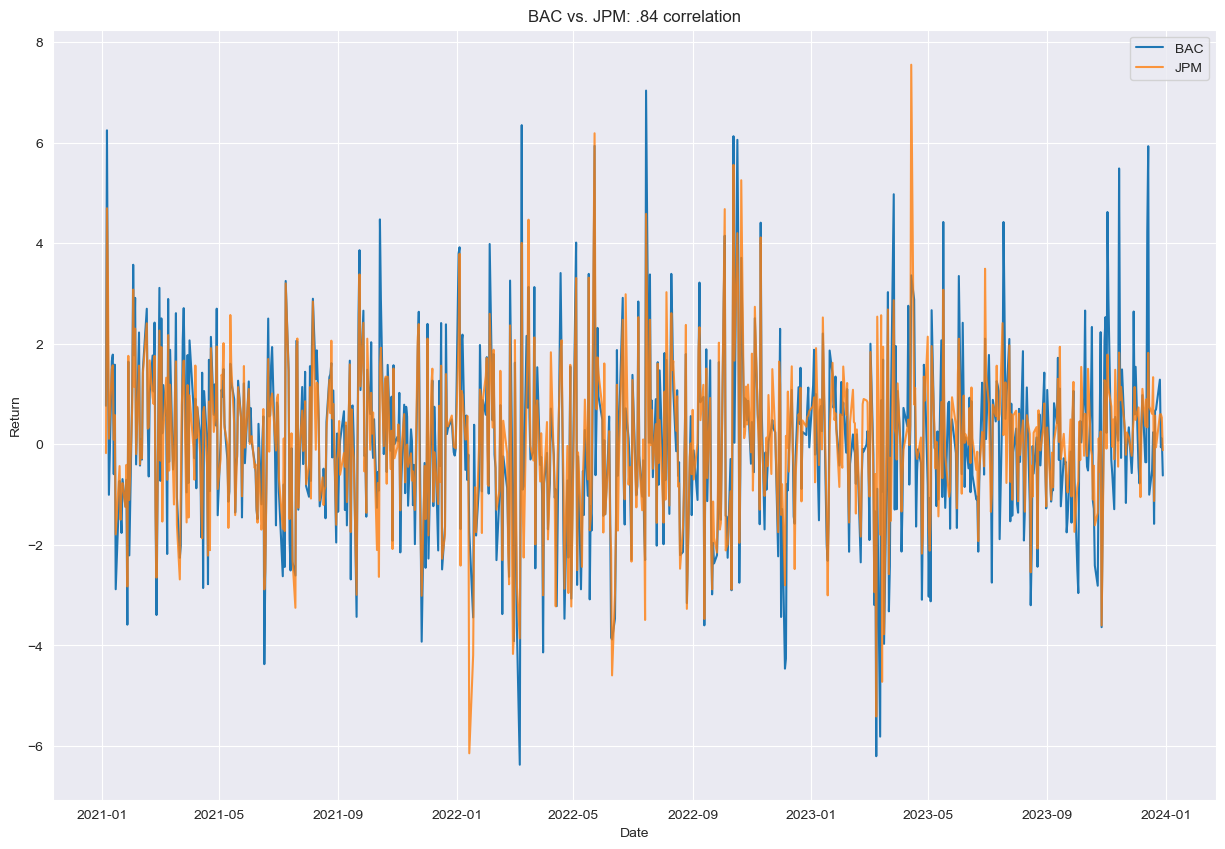

In [10]:
f, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(stockData['BAC'],x='Date',y='Return', label='BAC')
sns.lineplot(stockData['JPM'],x='Date',y='Return',alpha=.8, label='JPM')
plt.title('BAC vs. JPM: .84 correlation')
plt.show()

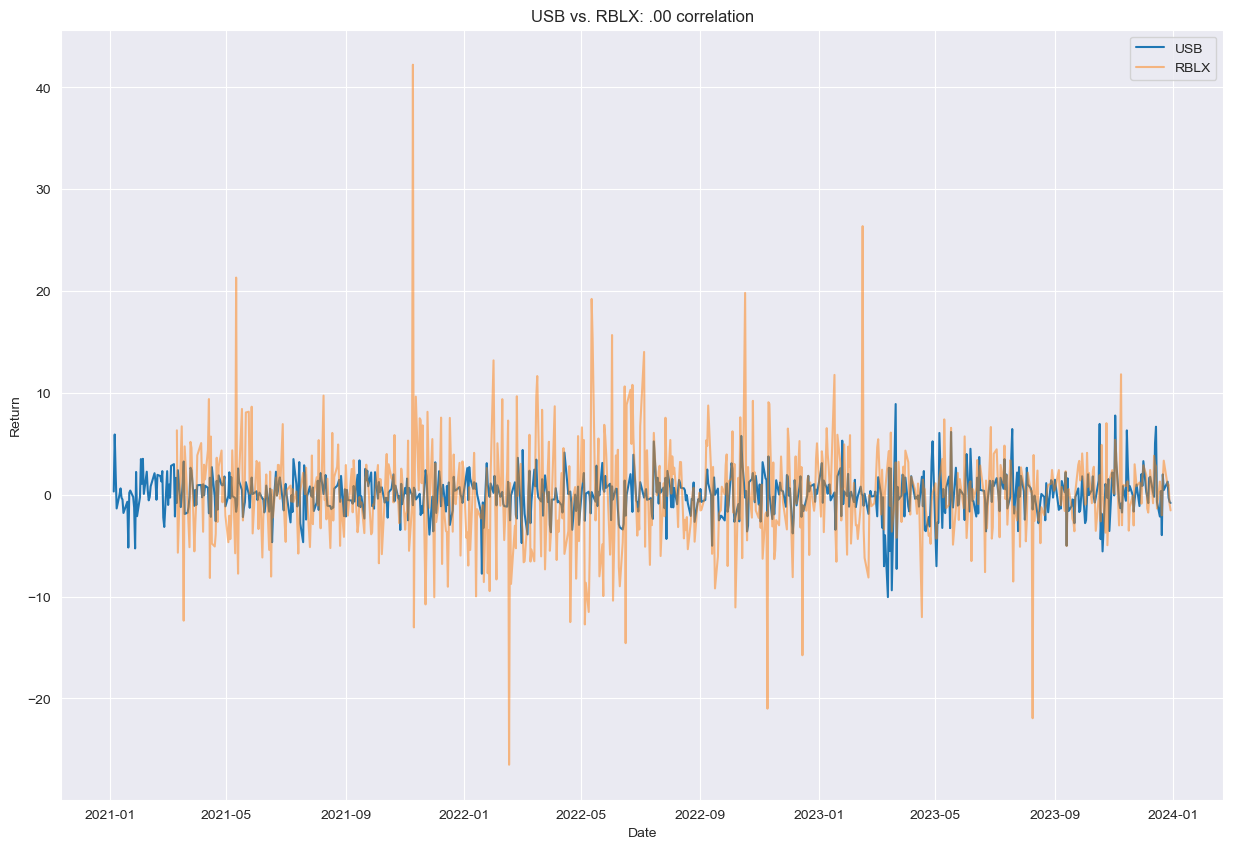

In [11]:
f, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(stockData['USB'],x='Date',y='Return', label='USB')
sns.lineplot(stockData['RBLX'],x='Date',y='Return',alpha=.5, label='RBLX')
plt.title('USB vs. RBLX: .00 correlation')
plt.show()

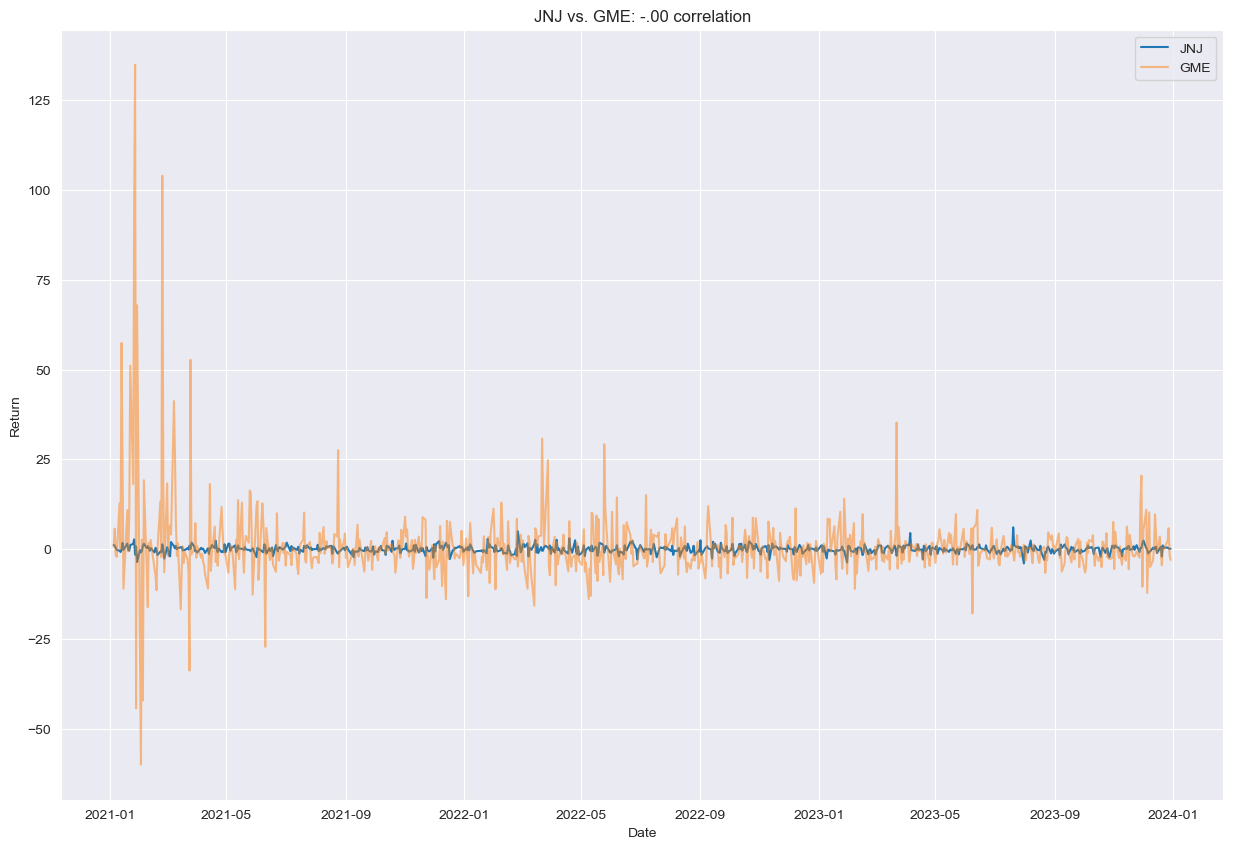

In [12]:
f, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(stockData['JNJ'],x='Date',y='Return', label='JNJ')
sns.lineplot(stockData['GME'],x='Date',y='Return',alpha=.5, label='GME')
plt.title('JNJ vs. GME: -.00 correlation')
plt.show()

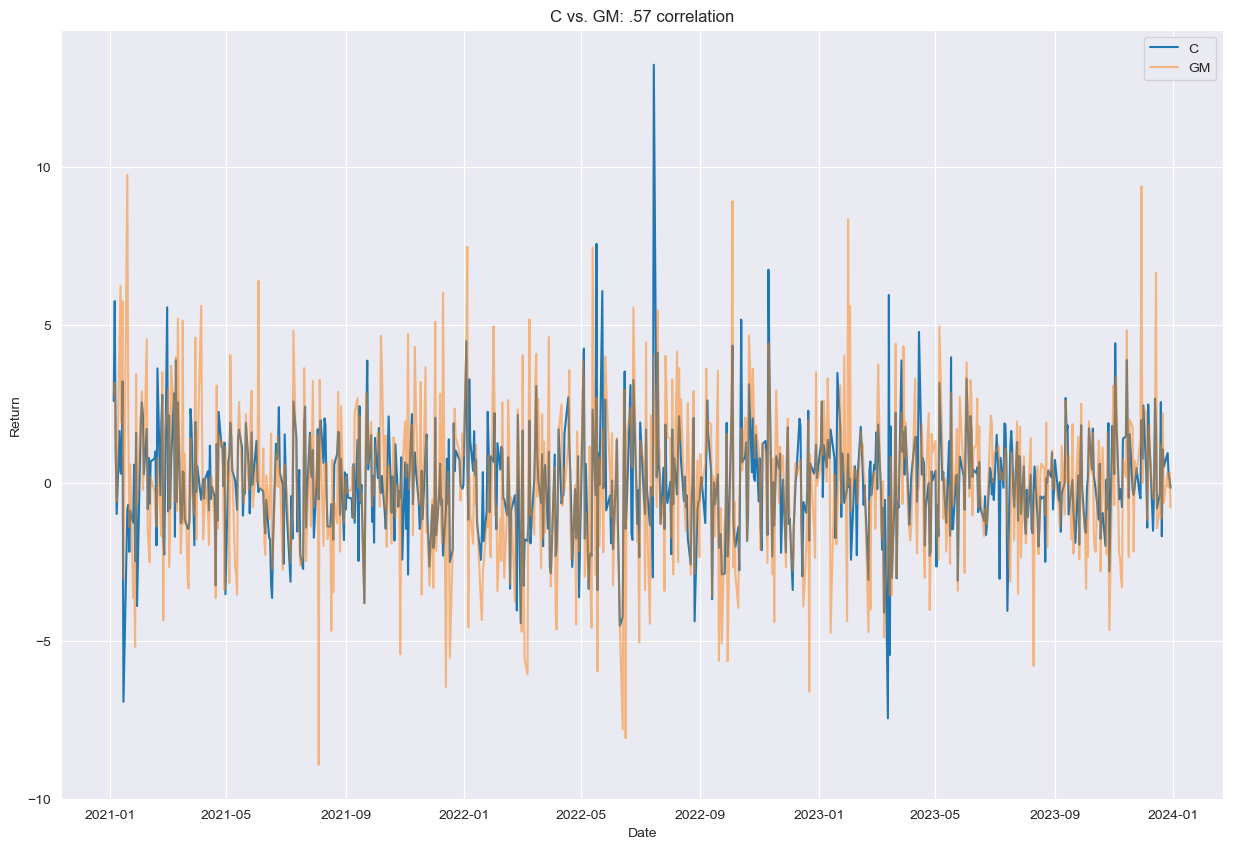

In [13]:
f, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(stockData['C'],x='Date',y='Return', label='C')
sns.lineplot(stockData['GM'],x='Date',y='Return',alpha=.5, label='GM')
plt.title('C vs. GM: .57 correlation')
plt.show()

After looking at these graphs, we can see some stocks are correlated with each other inside their own sector. When we perform our modeling, we will see how they compare to each other in order to see which sector as a whole has the best outlook.